In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date
from scipy import stats
from scipy.stats import linregress
# Import API key
weather_api_key = "3ace39e3b2f8a54ad19bc966640642b4"
import xgboost as xgb
from xgboost import XGBClassifier as XGB
1640995840
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import datetime
import os
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
"http://api.openweathermap.org/data/2.5/forecast?lat=14.6937&lon=-17.4441&cnt=200&lang=fr&units=metric&appid=98e027721603ca32cead5457312b406a"

'http://api.openweathermap.org/data/2.5/forecast?lat=14.6937&lon=-17.4441&cnt=200&lang=fr&units=metric&appid=98e027721603ca32cead5457312b406a'

In [50]:
url = "http://api.openweathermap.org/data/2.5/forecast?lat=14.6937&lon=-17.4441&cnt=200&lang=fr&units=metric&appid=98e027721603ca32cead5457312b406a"
response = requests.get(url)


In [51]:
json = response.json() 

In [52]:
json = response.json() 

In [53]:
data = json['list']
data[0]

{'dt': 1681344000,
 'main': {'temp': 21.76,
  'feels_like': 22.24,
  'temp_min': 21.14,
  'temp_max': 21.76,
  'pressure': 1010,
  'sea_level': 1010,
  'grnd_level': 1010,
  'humidity': 86,
  'temp_kf': 0.62},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'peu nuageux',
   'icon': '02n'}],
 'clouds': {'all': 13},
 'wind': {'speed': 7.85, 'deg': 348, 'gust': 11.82},
 'visibility': 10000,
 'pop': 0.07,
 'sys': {'pod': 'n'},
 'dt_txt': '2023-04-13 00:00:00'}

In [54]:
dt = []
temp = []
feels_like = []
temp_min = []
temp_max = []
pressure = []
sea_level = []
grnd_level = []
humidity = []
temp_kf = []
weather_id = []
weather_main = []
weather_description = []
weather_icon = []
clouds_all = []
wind_speed = []
wind_deg = []
wind_gust = []
visibility = []
pop = []
sys_pod = []
dt_txt = []
latitude = []
longitute = []
for i in range(len(data)):
    dt.append(data[i]['dt'])
    temp.append(data[i]['main']['temp'])
    feels_like.append(data[i]['main']['feels_like'])
    temp_min.append(data[i]['main']['temp_min'])
    temp_max.append(data[i]['main']['temp_max'])
    pressure.append(data[i]['main']['pressure'])
    sea_level.append(data[i]['main']['sea_level'])
    grnd_level.append(data[i]['main']['grnd_level'])
    humidity.append(data[i]['main']['humidity'])
    temp_kf.append(data[i]['main']['temp_kf'])
    weather_id.append(data[i]['weather'][0]['id'])
    weather_main.append(data[i]['weather'][0]['main'])
    weather_description.append(data[i]['weather'][0]['description'])
    weather_icon.append(data[i]['weather'][0]['icon'])
    clouds_all.append(data[i]['clouds']['all'])
    wind_speed.append(data[i]['wind']['speed'])
    wind_deg.append(data[i]['wind']['deg'])
    wind_gust.append(data[i]['wind']['gust'])
    visibility.append(data[i]['visibility'])
    pop.append(data[i]['pop'])
    sys_pod.append(data[i]['sys']['pod'])
    dt_txt.append(data[i]['dt_txt'])
    latitude.append(14.6937)
    longitute.append(-17.4441)

In [55]:
d = {'dt': dt, 
     'latitude': latitude,
     'longitute': longitute,
     'temp': temp, 
     'feels_like': feels_like,
    'temp_min ':temp_min,
     'temp_max': temp_max, 
        'pressure':pressure,
     'sea_level': sea_level, 
     'grnd_level': grnd_level,
     'humidity': humidity,
       'temp_kf': temp_kf,
    'weather_id': weather_id,
    'weather_main': weather_main,
    'weather_description': weather_description,
    'weather_icon': weather_icon,
    'clouds_all': clouds_all,
    'wind_speed': wind_speed,
    'wind_deg': wind_deg,
    'wind_gust': wind_gust,
    'visibility': visibility,
    'pop': pop,
    'sys_pod': sys_pod,
    'dt_txt': dt_txt}
df = pd.DataFrame(data = d)

In [56]:
df

,dt,latitude,longitute,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,weather_description,weather_icon,clouds_all,wind_speed,wind_deg,wind_gust,visibility,pop,sys_pod,dt_txt
0,1681344000,14.6937,-17.4441,21.76,22.24,21.14,21.76,1010,1010,1010,...,peu nuageux,02n,13,7.85,348,11.82,10000,0.07,n,2023-04-13 00:00:00
1,1681354800,14.6937,-17.4441,21.25,21.68,20.84,21.25,1011,1011,1009,...,légère pluie,10n,41,5.74,21,9.28,10000,0.27,n,2023-04-13 03:00:00
2,1681365600,14.6937,-17.4441,20.68,21.02,20.68,20.68,1011,1011,1010,...,nuageux,04n,57,6.16,23,9.80,10000,0.10,n,2023-04-13 06:00:00
3,1681376400,14.6937,-17.4441,21.34,21.57,21.34,21.34,1013,1013,1012,...,nuageux,04d,76,5.37,19,7.58,10000,0.00,d,2023-04-13 09:00:00
4,1681387200,14.6937,-17.4441,22.27,22.48,22.27,22.27,1013,1013,1012,...,nuageux,04d,60,5.17,8,6.65,10000,0.00,d,2023-04-13 12:00:00
5,1681398000,14.6937,-17.4441,22.49,22.70,22.49,22.49,1010,1010,1008,...,nuageux,04d,66,6.46,343,7.54,10000,0.00,d,2023-04-13 15:00:00
6,1681408800,14.6937,-17.4441,22.33,22.63,22.33,22.33,1009,1009,1008,...,nuageux,04d,70,7.25,334,10.02,10000,0.00,d,2023-04-13 18:00:00
7,1681419600,14.6937,-17.4441,21.72,22.06,21.72,21.72,1011,1011,1009,...,nuageux,04n,59,6.73,337,10.04,10000,0.00,n,2023-04-13 21:00:00
8,1681430400,14.6937,-17.4441,21.40,21.76,21.40,21.40,1012,1012,1010,...,partiellement nuageux,03n,44,7.07,353,11.95,10000,0.00,n,2023-04-14 00:00:00
9,1681441200,14.6937,-17.4441,21.26,21.61,21.26,21.26,1009,1009,1008,...,nuageux,04n,64,7.19,6,11.95,10000,0.00,n,2023-04-14 03:00:00


In [57]:
df.head(1)

,dt,latitude,longitute,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,...,weather_description,weather_icon,clouds_all,wind_speed,wind_deg,wind_gust,visibility,pop,sys_pod,dt_txt
0,1681344000,14.6937,-17.4441,21.76,22.24,21.14,21.76,1010,1010,1010,...,peu nuageux,02n,13,7.85,348,11.82,10000,0.07,n,2023-04-13 00:00:00


In [58]:


df=df.drop(['latitude','longitute','dt','feels_like','sea_level','temp_kf','weather_main','weather_icon','weather_id','clouds_all','wind_deg','wind_gust','visibility','pop','sys_pod',],axis=1)
df.head(1)

,temp,temp_min,temp_max,pressure,grnd_level,humidity,weather_description,wind_speed,dt_txt
0,21.76,21.14,21.76,1010,1010,86,peu nuageux,7.85,2023-04-13 00:00:00


In [59]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = '/content/drive/My Drive/output.csv'
#with open(path, 'w', encoding = 'utf-8-sig') as f:
  #df.to_csv(f)

In [60]:
df["weather_description"].unique()

array(['peu nuageux', 'légère pluie', 'nuageux', 'partiellement nuageux',
       'couvert', 'ciel dégagé'], dtype=object)

In [61]:
df["temp"].unique()

array([21.76, 21.25, 20.68, 21.34, 22.27, 22.49, 22.33, 21.72, 21.4 ,
       21.26, 21.28, 21.59, 22.19, 22.35, 22.02, 21.46, 21.31, 21.38,
       21.52, 21.55, 22.08, 22.21, 21.63, 21.64, 21.44, 21.97, 22.47,
       22.67, 22.36, 22.03, 21.99, 21.73, 21.51, 21.83, 22.34, 22.48])

In [62]:
df["humidity"].unique()

array([86, 85, 78, 74, 73, 77, 81, 83, 84, 80, 76, 79, 82, 75])

In [63]:
df["wind_speed"].unique()

array([ 7.85,  5.74,  6.16,  5.37,  5.17,  6.46,  7.25,  6.73,  7.07,
        7.19,  6.6 ,  6.41,  6.3 ,  7.33,  9.53,  9.3 ,  9.29, 10.77,
        8.32,  7.59,  5.92,  7.09,  8.41,  8.28,  8.59,  8.75,  8.64,
        8.42,  6.71,  8.99,  9.8 ,  9.99, 10.42, 10.84,  9.67,  7.18,
        7.44,  7.87, 10.03])

In [64]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

temp                   0.0
temp_min               0.0
temp_max               0.0
pressure               0.0
grnd_level             0.0
humidity               0.0
weather_description    0.0
wind_speed             0.0
dt_txt                 0.0
dtype: float64

<ipython-input-65-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-65-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-65-d7ff55bd56f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

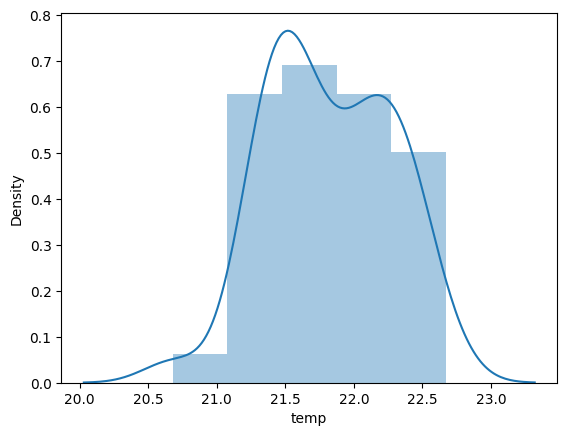

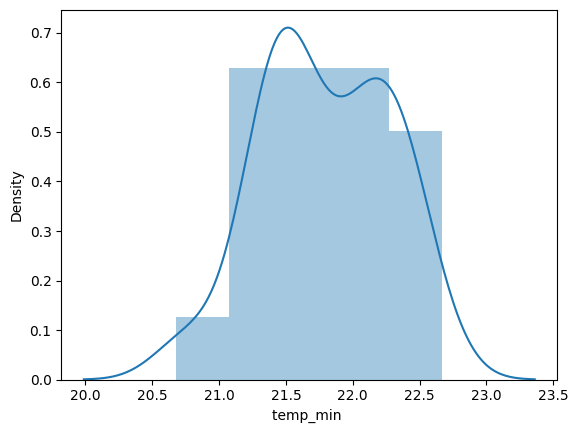

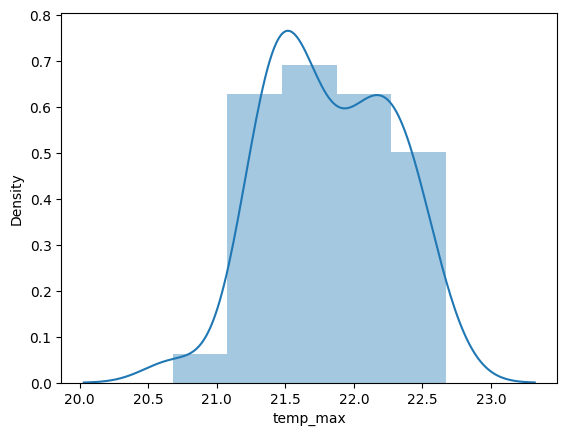

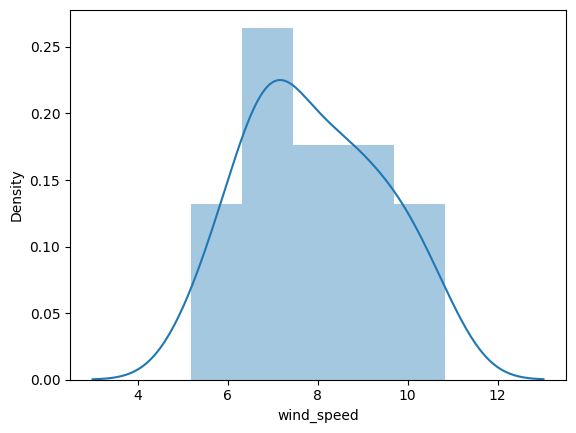

In [65]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

<Axes: ylabel='weather_description'>

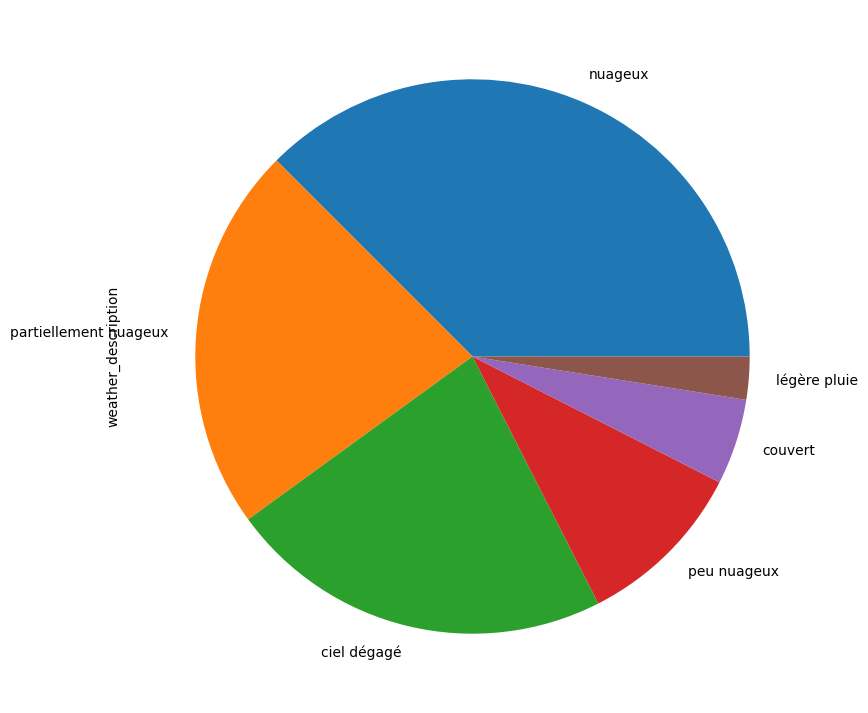

In [66]:
df["weather_description"].value_counts(normalize=True).plot.pie(legend=False, figsize=(9, 9))

<Axes: xlabel='weather_description'>

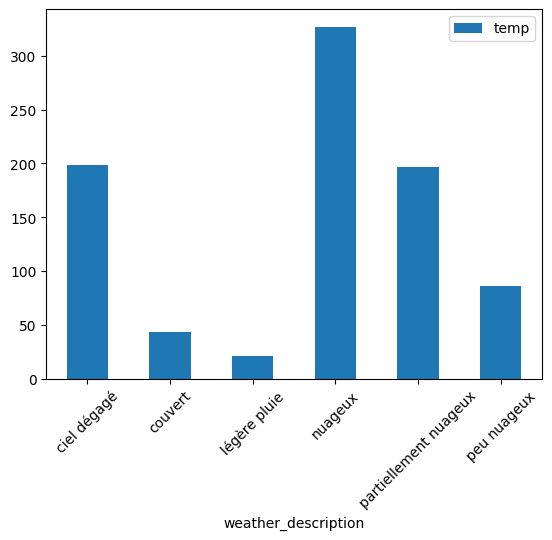

In [67]:
df.groupby("weather_description")["temp"].sum().plot.bar(rot=45, legend=True)

<ipython-input-68-f6e6d731016f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

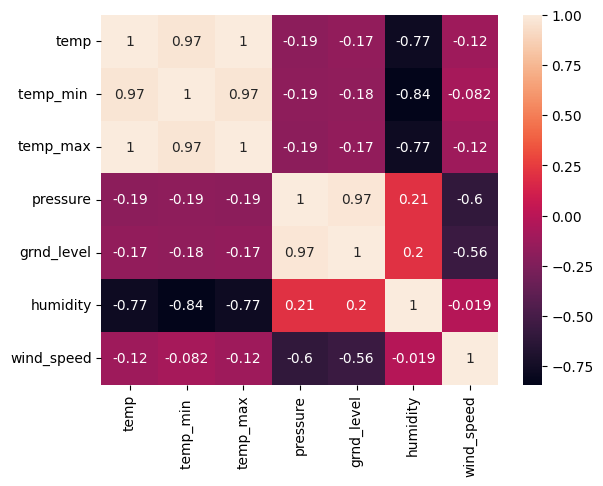

In [68]:
corr=df.corr()
corr
sns.heatmap(corr,annot=True)

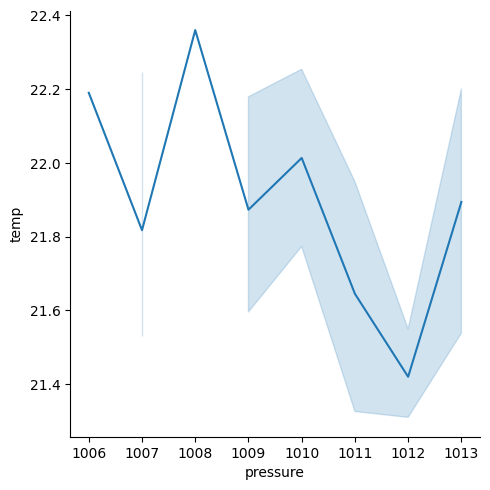

In [69]:
#sns.regplot(data=df,x='pression',y='temp',fit_reg=False)
sns.relplot(data=df, x='pressure', y='temp',kind="line")

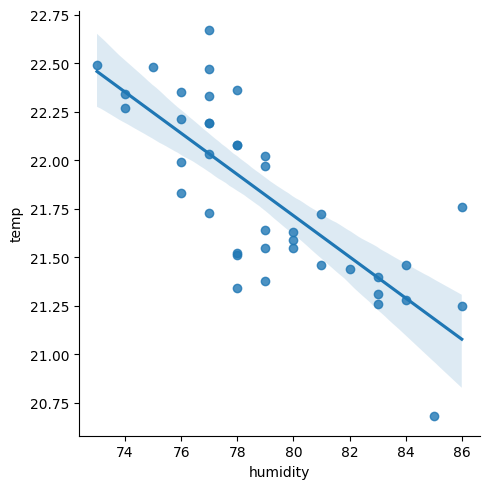

In [70]:
#sns.regplot(data=df,x='humidite',y='temp',fit_reg=False)
#sns.relplot(data=df, x='humidite', y='temp',kind="line")
sns.lmplot(data=df, x='humidity', y='temp')

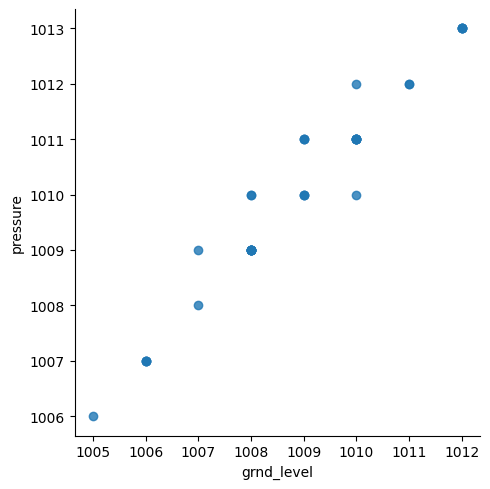

In [71]:
sns.lmplot(data=df,x='grnd_level',y='pressure',fit_reg=False)

<Axes: xlabel='weather_description', ylabel='count'>

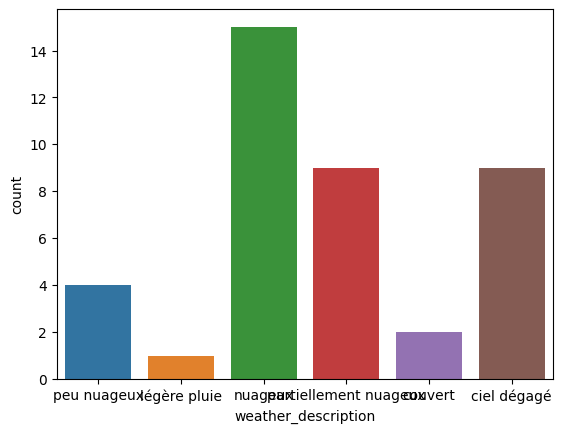

In [72]:
sns.countplot(x ='weather_description', data = df)


In [73]:
df.weather_description.unique()

array(['peu nuageux', 'légère pluie', 'nuageux', 'partiellement nuageux',
       'couvert', 'ciel dégagé'], dtype=object)

In [74]:
cleanup_nums={'weather_description':{'peu nuageux':0 , 'légère pluie':1 , 'nuageux' :2 , 'partiellement nuageux':3 ,'couvert':4 ,'ciel dégagé':5}}
df.replace(cleanup_nums,inplace=True)
#df['meteo']=LabelEncoder().fit_transform(df['meteo'])

In [75]:
df.weather_description.unique()

array([0, 1, 2, 3, 4, 5])

In [76]:
df['temp'] = df['temp'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76      1010        1010        86   
1   21.25      20.84     21.25      1011        1009        86   
2   20.68      20.68     20.68      1011        1010        85   
3   21.34      21.34     21.34      1013        1012        78   
4   22.27      22.27     22.27      1013        1012        74   
5   22.49      22.49     22.49      1010        1008        73   
6   22.33      22.33     22.33      1009        1008        77   
7   21.72      21.72     21.72      1011        1009        81   
8   21.40      21.40     21.40      1012        1010        83   
9   21.26      21.26     21.26      1009        1008        83   
10  21.28      21.28     21.28      1011        1009        84   
11  21.59      21.59     21.59      1013        1012        80   
12  22.19      22.19     22.19      1013        1012        77   
13  22.35      22.35     22.35      1011        1010        76   
14  22.02 

In [77]:
df['wind_speed'] = df['wind_speed'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76      1010        1010        86   
1   21.25      20.84     21.25      1011        1009        86   
2   20.68      20.68     20.68      1011        1010        85   
3   21.34      21.34     21.34      1013        1012        78   
4   22.27      22.27     22.27      1013        1012        74   
5   22.49      22.49     22.49      1010        1008        73   
6   22.33      22.33     22.33      1009        1008        77   
7   21.72      21.72     21.72      1011        1009        81   
8   21.40      21.40     21.40      1012        1010        83   
9   21.26      21.26     21.26      1009        1008        83   
10  21.28      21.28     21.28      1011        1009        84   
11  21.59      21.59     21.59      1013        1012        80   
12  22.19      22.19     22.19      1013        1012        77   
13  22.35      22.35     22.35      1011        1010        76   
14  22.02 

In [78]:
df['pressure'] = df['pressure'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76    1010.0        1010        86   
1   21.25      20.84     21.25    1011.0        1009        86   
2   20.68      20.68     20.68    1011.0        1010        85   
3   21.34      21.34     21.34    1013.0        1012        78   
4   22.27      22.27     22.27    1013.0        1012        74   
5   22.49      22.49     22.49    1010.0        1008        73   
6   22.33      22.33     22.33    1009.0        1008        77   
7   21.72      21.72     21.72    1011.0        1009        81   
8   21.40      21.40     21.40    1012.0        1010        83   
9   21.26      21.26     21.26    1009.0        1008        83   
10  21.28      21.28     21.28    1011.0        1009        84   
11  21.59      21.59     21.59    1013.0        1012        80   
12  22.19      22.19     22.19    1013.0        1012        77   
13  22.35      22.35     22.35    1011.0        1010        76   
14  22.02 

In [79]:
df['grnd_level'] = df['grnd_level'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76    1010.0      1010.0        86   
1   21.25      20.84     21.25    1011.0      1009.0        86   
2   20.68      20.68     20.68    1011.0      1010.0        85   
3   21.34      21.34     21.34    1013.0      1012.0        78   
4   22.27      22.27     22.27    1013.0      1012.0        74   
5   22.49      22.49     22.49    1010.0      1008.0        73   
6   22.33      22.33     22.33    1009.0      1008.0        77   
7   21.72      21.72     21.72    1011.0      1009.0        81   
8   21.40      21.40     21.40    1012.0      1010.0        83   
9   21.26      21.26     21.26    1009.0      1008.0        83   
10  21.28      21.28     21.28    1011.0      1009.0        84   
11  21.59      21.59     21.59    1013.0      1012.0        80   
12  22.19      22.19     22.19    1013.0      1012.0        77   
13  22.35      22.35     22.35    1011.0      1010.0        76   
14  22.02 

In [80]:
df['humidity'] = df['humidity'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76    1010.0      1010.0      86.0   
1   21.25      20.84     21.25    1011.0      1009.0      86.0   
2   20.68      20.68     20.68    1011.0      1010.0      85.0   
3   21.34      21.34     21.34    1013.0      1012.0      78.0   
4   22.27      22.27     22.27    1013.0      1012.0      74.0   
5   22.49      22.49     22.49    1010.0      1008.0      73.0   
6   22.33      22.33     22.33    1009.0      1008.0      77.0   
7   21.72      21.72     21.72    1011.0      1009.0      81.0   
8   21.40      21.40     21.40    1012.0      1010.0      83.0   
9   21.26      21.26     21.26    1009.0      1008.0      83.0   
10  21.28      21.28     21.28    1011.0      1009.0      84.0   
11  21.59      21.59     21.59    1013.0      1012.0      80.0   
12  22.19      22.19     22.19    1013.0      1012.0      77.0   
13  22.35      22.35     22.35    1011.0      1010.0      76.0   
14  22.02 

In [81]:
df['weather_description'] = df['weather_description'].fillna(0).astype(float)
print(df)
print(df.dtypes)

     temp  temp_min   temp_max  pressure  grnd_level  humidity  \
0   21.76      21.14     21.76    1010.0      1010.0      86.0   
1   21.25      20.84     21.25    1011.0      1009.0      86.0   
2   20.68      20.68     20.68    1011.0      1010.0      85.0   
3   21.34      21.34     21.34    1013.0      1012.0      78.0   
4   22.27      22.27     22.27    1013.0      1012.0      74.0   
5   22.49      22.49     22.49    1010.0      1008.0      73.0   
6   22.33      22.33     22.33    1009.0      1008.0      77.0   
7   21.72      21.72     21.72    1011.0      1009.0      81.0   
8   21.40      21.40     21.40    1012.0      1010.0      83.0   
9   21.26      21.26     21.26    1009.0      1008.0      83.0   
10  21.28      21.28     21.28    1011.0      1009.0      84.0   
11  21.59      21.59     21.59    1013.0      1012.0      80.0   
12  22.19      22.19     22.19    1013.0      1012.0      77.0   
13  22.35      22.35     22.35    1011.0      1010.0      76.0   
14  22.02 

In [82]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [83]:
df.head(1)

,temp,temp_min,temp_max,pressure,grnd_level,humidity,weather_description,wind_speed,dt_txt
0,21.76,21.14,21.76,1010.0,1010.0,86.0,0.0,7.85,2023-04-13 00:00:00


In [84]:
df.drop('dt_txt',axis=1,inplace=True)
df

,temp,temp_min,temp_max,pressure,grnd_level,humidity,weather_description,wind_speed
0,21.76,21.14,21.76,1010.0,1010.0,86.0,0.0,7.85
1,21.25,20.84,21.25,1011.0,1009.0,86.0,1.0,5.74
2,20.68,20.68,20.68,1011.0,1010.0,85.0,2.0,6.16
3,21.34,21.34,21.34,1013.0,1012.0,78.0,2.0,5.37
4,22.27,22.27,22.27,1013.0,1012.0,74.0,2.0,5.17
5,22.49,22.49,22.49,1010.0,1008.0,73.0,2.0,6.46
6,22.33,22.33,22.33,1009.0,1008.0,77.0,2.0,7.25
7,21.72,21.72,21.72,1011.0,1009.0,81.0,2.0,6.73
8,21.40,21.40,21.40,1012.0,1010.0,83.0,3.0,7.07
9,21.26,21.26,21.26,1009.0,1008.0,83.0,2.0,7.19


In [85]:
x=((df.loc[:,df.columns!="weather_description"]).astype(int)).values[:,0:]
x

array([[  21,   21,   21, 1010, 1010,   86,    7],
       [  21,   20,   21, 1011, 1009,   86,    5],
       [  20,   20,   20, 1011, 1010,   85,    6],
       [  21,   21,   21, 1013, 1012,   78,    5],
       [  22,   22,   22, 1013, 1012,   74,    5],
       [  22,   22,   22, 1010, 1008,   73,    6],
       [  22,   22,   22, 1009, 1008,   77,    7],
       [  21,   21,   21, 1011, 1009,   81,    6],
       [  21,   21,   21, 1012, 1010,   83,    7],
       [  21,   21,   21, 1009, 1008,   83,    7],
       [  21,   21,   21, 1011, 1009,   84,    6],
       [  21,   21,   21, 1013, 1012,   80,    6],
       [  22,   22,   22, 1013, 1012,   77,    6],
       [  22,   22,   22, 1011, 1010,   76,    7],
       [  22,   22,   22, 1010, 1009,   79,    9],
       [  21,   21,   21, 1011, 1010,   84,    9],
       [  21,   21,   21, 1012, 1011,   83,    9],
       [  21,   21,   21, 1009, 1008,   79,   10],
       [  21,   21,   21, 1010, 1009,   78,    8],
       [  21,   21,   21, 1012,

In [86]:
y=df["weather_description"].values
y

array([0., 1., 2., 2., 2., 2., 2., 2., 3., 2., 2., 3., 3., 3., 3., 0., 2.,
       4., 2., 3., 2., 4., 2., 3., 0., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       0., 2., 2., 2., 3., 3.])

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [88]:
#seed = 27
#test_size = 0.09
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
#fit model no training data
#model = XGBClassifier()
#model.fit(X_train, y_train)
# make predictions for test data
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
#evaluate predictions
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0)))#

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [90]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [91]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:75.00%


In [92]:

import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:25.00%


In [93]:
input=[[  24, 1008, 1007,   79,    2]]
ot=xgb.predict(input)
print("Conditions météorologiques:")
if(ot==0):
    print("ciel dégagé")
elif(ot==1):
    print("peu nuageux")
elif(ot==2):
    print("partiellement nuageux")
elif(ot==3):
    print("nuageux")
else:
    print("couvert")

Conditions météorologiques:
partiellement nuageux


In [94]:
import pickle
pickle.dump(svm, open('svm.pkl', 'wb'))

In [95]:
import pickle
pickle.dump(xgb, open('xgb.pkl', 'wb'))

In [96]:
pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
pip install pyttsx3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyaudio

In [99]:
import speech_recognition as sr
import requests
import json
import pyttsx3
from gtts import gTTS
from io import BytesIO

In [100]:
# Chargement du modèle XGBoost enregistré dans un fichier pickle
with open('xgb.pkl', 'rb') as f:
    model = pickle.load(f)

### JE PARTAGE AVEC VOUS LE CODE DU CHATBOT DEVELOPPER SUR LLE FICHIER PY DE ANACONDA AVEC LE PACKAGE STREAMLIT ####

In [106]:
import streamlit as st
import speech_recognition as sr
import requests
import json
import pyttsx3
import pickle
from gtts import gTTS
from io import BytesIO

# Chargement du modèle XGBoost enregistré dans un fichier pickle
with open('xgb.pkl', 'rb') as f:
    model = pickle.load(f)

# Obtention de la ville à partir de laquelle l'utilisateur veut obtenir la météo
# Message d'introduction
st.title("Chatbot météo")
st.write("Bienvenue sur le chatbot météo ! Vous pouvez parler ou taper le nom de votre ville ou votre code postal pour connaître les prévisions météorologiques.")

# Configuration de la reconnaissance vocale
r = sr.Recognizer()
with sr.Microphone() as source:
    st.write("Dites le nom de la ville")
    audio = r.listen(source)

# Obtention de la ville avec la reconnaissance vocale
try:
    city = r.recognize_google(audio, language='fr-FR')
    st.write(f"Vous avez demandé la météo pour la ville de {city}")
except:
    st.write("Je n'ai pas compris la ville que vous avez dit.")
    city = None
st.write(f"Vous avez demandé la météo pour la ville de {city}")

# Récupération des données météorologiques
if city:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&lang=fr&appid=98e027721603ca32cead5457312b406a"
    response = requests.get(url)
    data = response.json()
    st.image(f"http://openweathermap.org/img/wn/{data['weather'][0]['icon']}.png")
    st.write(f"Conditions météorologiques: {data['weather'][0]['description']}")
    st.write(f"Température: {round(data['main']['temp'] - 273.15)}°C")
    st.write(f"Humidité: {data['main']['humidity']}%")
    st.write(f"Vitesse du vent: {data['wind']['speed']} m/s")

    # Fonction pour obtenir les prévisions météorologiques à partir d'une API
def get_weather(city):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&lang=fr&appid=98e027721603ca32cead5457312b406a"
    response = requests.get(url)
    data1 = response.json()
    return data1
    
    # Fonction pour convertir du texte en parole
def text_to_speech(text):
    with BytesIO() as file:
        gTTS(text=text, lang='fr').write_to_fp(file)
        file.seek(0)
        return file.read()

city = st.text_input("Ville ")
submit_button = st.button("Obtenir la prévision météorologique")
        
if submit_button:
    data1 = get_weather(city)
    
    # Affichage de la réponse du chatbot et des prévisions météorologiques
    st.write(f"Conditions météorologiques: {data1['weather'][0]['description']}")
    st.write(f"Température: {round(data1['main']['temp'] - 273.15)}°C")
    st.write(f"Humidité: {data1['main']['humidity']}%")
    st.write(f"Vitesse du vent: {data1['wind']['speed']} m/s")
    
    
    # Synthèse vocale de la réponse du chatbot
    audio_file = text_to_speech(f"La prévision météorologique pour {data1['name']} est {data1['weather'][0]['description']} avec une température de {round(data1['main']['temp'] - 273.15)} degrés Celsius, une humidité de {data1['main']['humidity']} pour cent et une vitesse de vent de {data1['wind']['speed']} mètres par seconde.")
    st.audio(audio_file, format='audio/mp3')

# Bouton pour effacer l'historique des discussions et recommencer une nouvelle conversation
if st.button("Effacer l'historique des discussions"):
    st.session_state.history = []

# Affichage de l'historique des discussions
if 'history' not in st.session_state:
    st.session_state.history = []
for message in st.session_state.history:
    st.write(message)
    audio_file = text_to_speech(message)
    st.audio(audio_file, format='audio/mp3')

# Ajout de nouveaux messages à l'historique des discussions
if submit_button:
    st.session_state.history.append(f"Prévision météorologique pour {data1['name']}: {data1['weather'][0]['description']}, température de {round(data1['main']['temp'] - 273.15)}°C, humidité de {data1['main']['humidity']}%, vitesse de vent de {data1['wind']['speed']} m/s.")